In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#file downloaded from https://fred.stlouisfed.org/
df = pd.read_csv('../DATA/RSCCASN.csv',parse_dates=True,index_col='DATE')

In [3]:
df.columns = ['Sales']

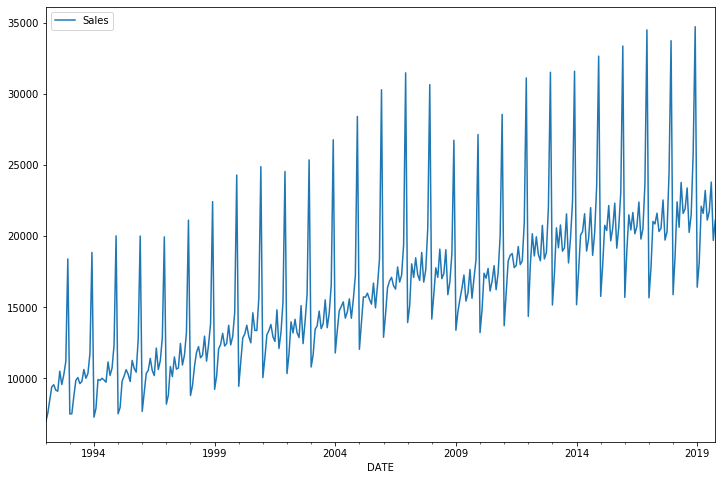

In [4]:
df.plot(figsize=(12,8))

In [5]:
len(df)

334

In [6]:
len(df) - 18

316

In [7]:
test_size = 18
test_ind = len(df) - test_size

In [8]:
train=df.iloc[:test_ind]
test=df.iloc[test_ind:]

In [9]:
from sklearn.preprocessing import MinMaxScaler


In [10]:
scaler = MinMaxScaler()

In [11]:
scaler.fit(train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [12]:
scaled_train = scaler.transform(train)

In [13]:
scaled_test = scaler.transform(test)

In [14]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [15]:
len(test)

18

In [16]:
length = 12
generator = TimeseriesGenerator(scaled_train,scaled_train,
                               length = length,
                               batch_size=1)

In [17]:
X,y = generator[0]

In [18]:
from tensorflow.keras.models import Sequential

In [19]:
from tensorflow.keras.layers import Dense,LSTM

In [20]:
n_features = 1

In [21]:
model = Sequential()

model.add(LSTM(100,activation='relu',
               input_shape=(length,n_features)))
model.add(Dense(1))
model.compile(optimizer='adam',loss='mse')

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100)               40800     
_________________________________________________________________
dense (Dense)                (None, 1)                 101       
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________


In [23]:
from tensorflow.keras.callbacks import EarlyStopping

In [24]:
early_stop = EarlyStopping(monitor='val_loss',patience=2)


In [25]:
validation_generator = TimeseriesGenerator(scaled_test,scaled_test,
                                          length=length,
                                          batch_size=1)

In [26]:
model.fit_generator(generator,epochs=20,
                   validation_data=validation_generator,callbacks=[early_stop])

Instructions for updating:
Please use Model.fit, which supports generators.
  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 304 steps, validate for 6 steps
Epoch 1/20
304/304 [==============================] - 3s 11ms/step - loss: 0.0252 - val_loss: 0.0026
Epoch 2/20
304/304 [==============================] - 2s 7ms/step - loss: 0.0185 - val_loss: 0.0029
Epoch 3/20
304/304 [==============================] - 2s 7ms/step - loss: 0.0133 - val_loss: 0.0019
Epoch 4/20
304/304 [==============================] - 2s 6ms/step - loss: 0.0051 - val_loss: 3.8008e-04
Epoch 5/20
304/304 [==============================] - 2s 6ms/step - loss: 0.0038 - val_loss: 0.0021
Epoch 6/20
304/304 [==============================] - 2s 6ms/step - loss: 0.0031 - val_loss: 6.1471e-04


In [27]:
losses = pd.DataFrame(model.history.history)

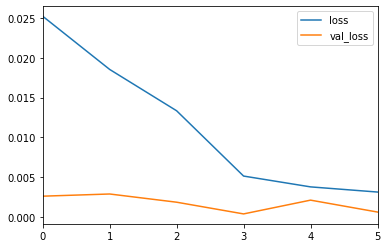

In [28]:
losses.plot()

In [29]:
test_predictions = []

first_eval_batch = scaled_train[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(len(test)):
    
    # get prediction 1 time stamp ahead ([0] is for grabbing just the number instead of [array])
    current_pred = model.predict(current_batch)[0]
    
    # store prediction
    test_predictions.append(current_pred) 
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

In [88]:
true_predictions = scaler.inverse_transform(test_predictions)

In [89]:
test['Predictions'] = true_predictions

C:\Users\mikic\Anaconda3\envs\TensorFlow\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [90]:
test

,Sales,Predictions
DATE,,
2018-05-01,23764,23211.467675
2018-06-01,21589,21949.654485
2018-07-01,21919,22220.134495
2018-08-01,23381,24210.737076
2018-09-01,20260,21585.693212
2018-10-01,21473,22298.505089
2018-11-01,25831,26490.256523
2018-12-01,34706,39268.063414
2019-01-01,16410,17638.592129


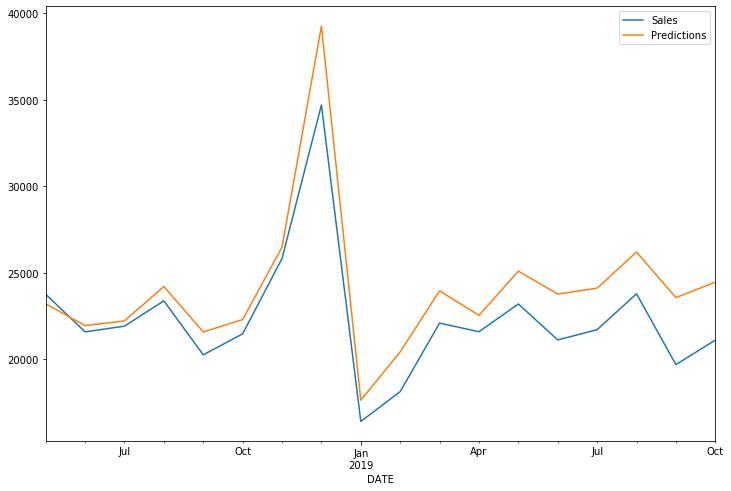

In [91]:
test.plot(figsize=(12,8))

In [96]:
full_scaler = MinMaxScaler()
scaled_full_data = full_scaler.fit_transform(df)

In [97]:
length = 12
generator = TimeseriesGenerator(scaled_full_data,scaled_full_data,
                               length=length,batch_size=1)

In [99]:
model = Sequential()
model.add(LSTM(100,activation='relu',input_shape=(length,n_features)))
model.add(Dense(1))
model.compile(optimizer='adam',loss='mse')

model.fit_generator(generator,epochs=8)

  ...
    to  
  ['...']
Train for 322 steps
Epoch 1/8
322/322 [==============================] - 3s 8ms/step - loss: 0.0241
Epoch 2/8
322/322 [==============================] - 2s 5ms/step - loss: 0.0181
Epoch 3/8
322/322 [==============================] - 2s 7ms/step - loss: 0.0074
Epoch 4/8
322/322 [==============================] - 2s 7ms/step - loss: 0.0044
Epoch 5/8
322/322 [==============================] - 2s 6ms/step - loss: 0.0034
Epoch 6/8
322/322 [==============================] - 2s 6ms/step - loss: 0.0017
Epoch 7/8
322/322 [==============================] - 2s 5ms/step - loss: 0.0014
Epoch 8/8
322/322 [==============================] - 2s 5ms/step - loss: 0.0013


In [100]:
forecast = []
periods = 12

first_eval_batch = scaled_train[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(periods):
    
    # get prediction 1 time stamp ahead ([0] is for grabbing just the number instead of [array])
    current_pred = model.predict(current_batch)[0]
    
    # store prediction
    forecast.append(current_pred) 
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

In [102]:
forecast = scaler.inverse_transform(forecast)

In [104]:
test

,Sales,Predictions
DATE,,
2018-05-01,23764,23211.467675
2018-06-01,21589,21949.654485
2018-07-01,21919,22220.134495
2018-08-01,23381,24210.737076
2018-09-01,20260,21585.693212
2018-10-01,21473,22298.505089
2018-11-01,25831,26490.256523
2018-12-01,34706,39268.063414
2019-01-01,16410,17638.592129


In [106]:
forecast_index = pd.date_range(start='2019-11-01',periods=periods,
                             freq="MS")

In [108]:
forecast_df = pd.DataFrame(data=forecast,index=forecast_index,
                          columns=['Forecast'])

(576, 611)

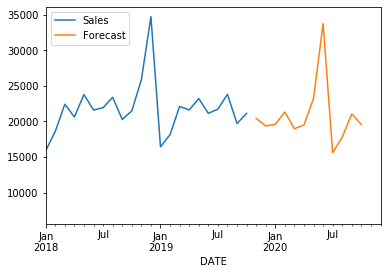

In [110]:
ax = df.plot()
forecast_df.plot(ax=ax)
plt.xlim('2018-01-01','2020-12-01')

In [111]:
a = pd.concat([df,forecast_df],axis=0)

C:\Users\mikic\Anaconda3\envs\TensorFlow\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [120]:
b = pd.DataFrame(data=forecast,index=forecast_index,
                          columns=['Sales'])

In [123]:
c = pd.concat([df,b],axis=0)

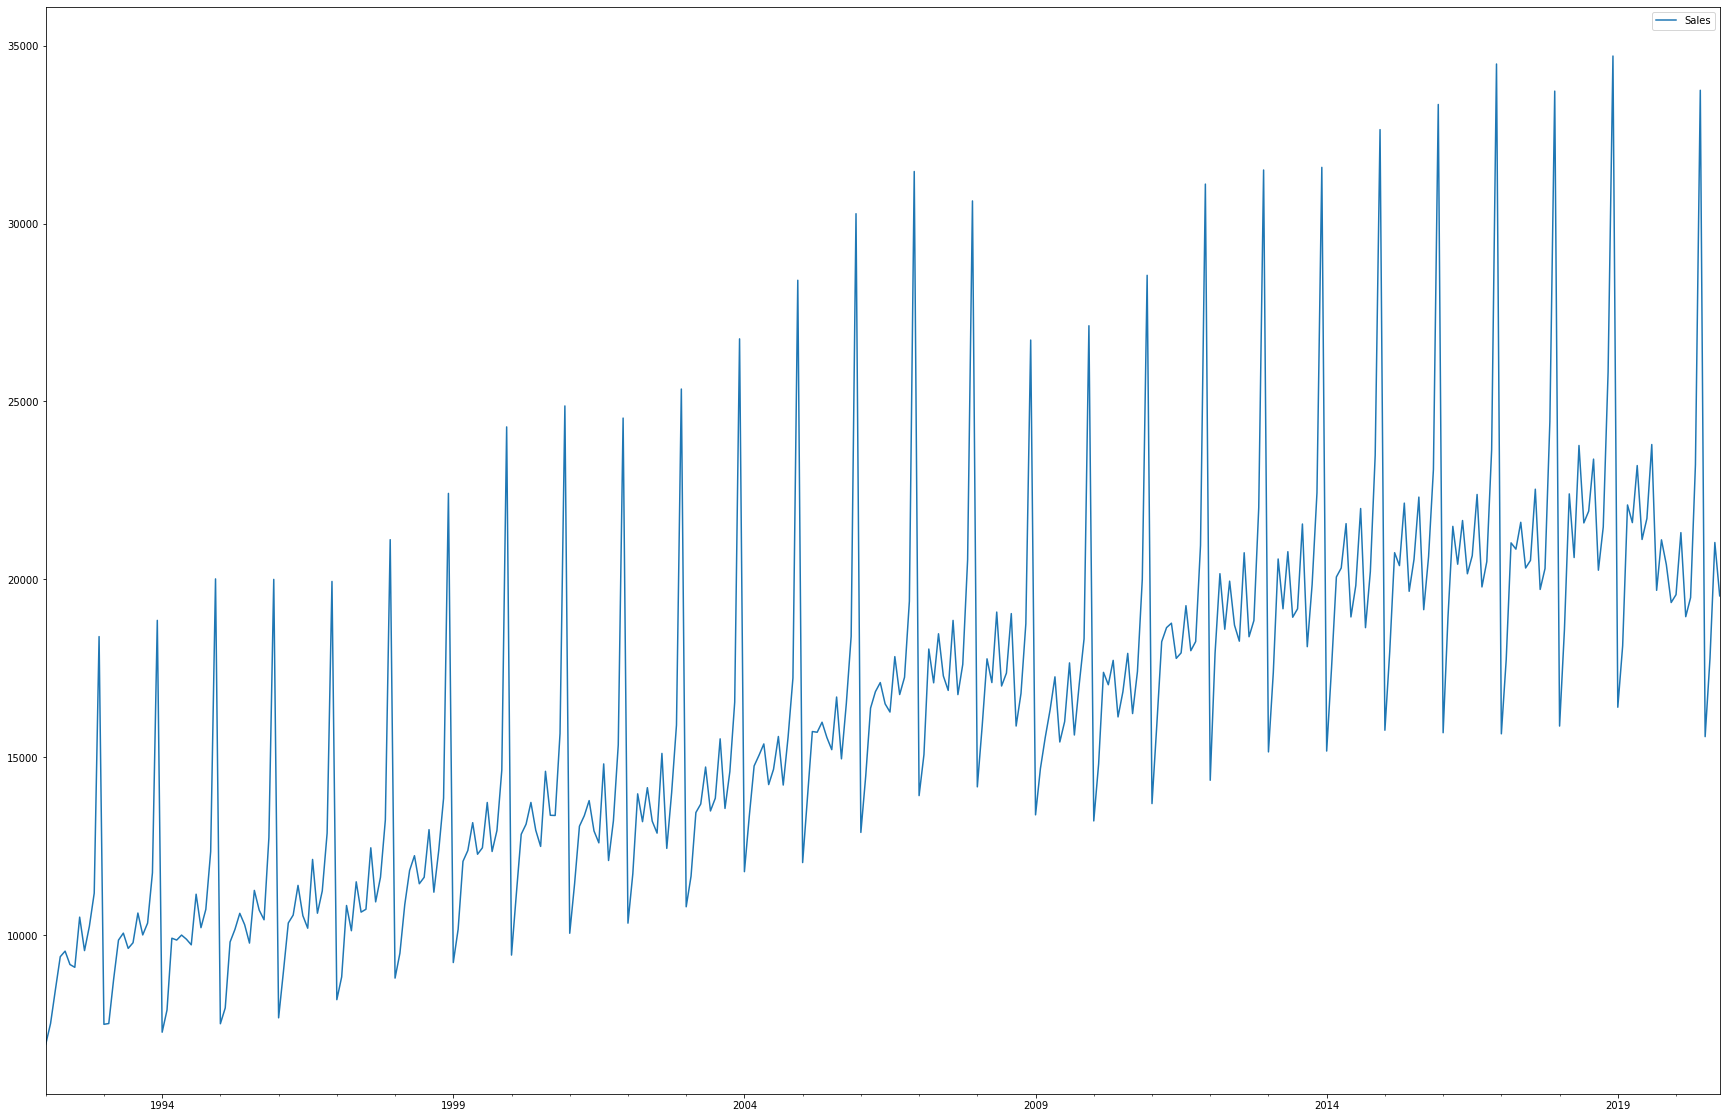

In [133]:
c.plot(figsize=(30,20))
